# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [ ]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'
professions = ["Репетитор по математике", "Юрист", "Уборщик", "Художник", "Строитель"]
all_data = []
for prof in professions:
     params = {
    'text': prof,
    'area': 1,
    'page': 0,
    'per_page': 100
     }
     data = requests.get(URL, params=params).json()
     all_data.append(data)

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
all_data

[{'items': [{'id': '95842334',
    'premium': False,
    'name': 'Project Manager в образовательный проект',
    'department': None,
    'has_test': False,
    'response_letter_required': False,
    'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
    'salary': {'from': 150000, 'to': None, 'currency': 'RUR', 'gross': True},
    'type': {'id': 'open', 'name': 'Открытая'},
    'address': None,
    'response_url': None,
    'sort_point_distance': None,
    'published_at': '2024-04-20T21:53:40+0300',
    'created_at': '2024-04-20T21:53:40+0300',
    'archived': False,
    'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=95842334',
    'show_logo_in_search': None,
    'insider_interview': None,
    'url': 'https://api.hh.ru/vacancies/95842334?host=hh.ru',
    'alternate_url': 'https://hh.ru/vacancy/95842334',
    'relations': [],
    'employer': {'id': '2657797',
     'name': 'Алгоритмика',
     'url': 'https://api.hh.ru/employers/2657797'

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:


sum(i['found'] for i in all_data)


7532

(1 балл) Посчитайте сколько всего найдено вакансий:

In [ ]:
count = 0
sum(i['found'] for i in all_data)


7531

In [ ]:
my_companies = []
for profi in all_data:
  for el in profi['items']:
    for key in el.keys():
      if (key == 'employer' and el[key] != None):
        my_companies.append(el[key]['name'])



(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
class Company:
    def __init__(self, name, coord_x, coord_y):
      self.company_name = name
      self.lat = coord_x
      self.lng = coord_y
    def coords(self):
      return (self.lat, self.lng)



(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
print(len(my_companies))
my_comp = set(my_companies)
Companies = []
print(len(my_comp))

for profi in all_data:
  for elem in profi['items']:
    if (elem['employer']['name'] in my_comp):
      if (elem['address'] != None):
        lat = elem['address']['lat']
        lng = elem['address']['lng']
        if (lat and lng):
          Companies.append(Company(elem['employer']['name'], lat, lng))
        else:
          Companies.append(Company(elem['employer']['name'], 0, 0))
      else:
        Companies.append(Company(elem['employer']['name'], 0, 0))



500
453


(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
# your code here
all = 0
for comp in Companies:
  if (comp.coords() != (0, 0)):
    all += 1

print(all)

306


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
def in_mkad1(lat, lng):
  return (55.545493<=lat<=55.931762 and 37.344287<=lng<=37.879998)
def in_mkad(lat, lng):
  lat_mkad = 55.73861111
  lng_mkad = 37.61222222
  radius_mkad = 0.23
  if (lng - lng_mkad) ** 2 + (lat - lat_mkad) ** 2 <= radius_mkad**2:
    return True
  return False
ans = 0
for comp in Companies:
  if (comp.coords() != (0, 0) and in_mkad(comp.coords()[0], comp.coords()[1])):
    ans += 1
print(ans)

281


(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

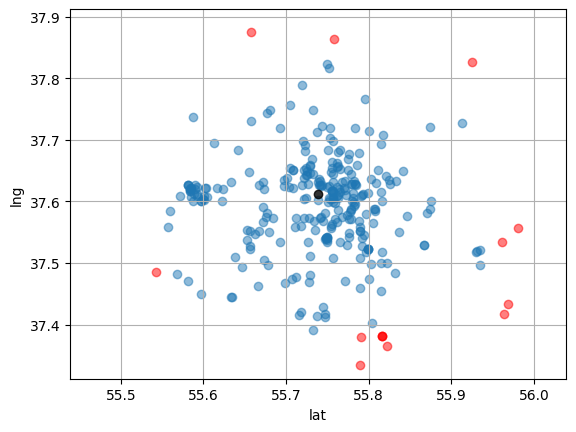

In [ ]:
import matplotlib.pyplot as plt
lat_coords = []
lng_coords = []

lat1_coords = []
lng1_coords = []
for comp in Companies:
  ma = comp.coords()
  if (ma != (0, 0) and in_mkad(comp.coords()[0], comp.coords()[1])):
     lat_coords.append(ma[0])
     lng_coords.append(ma[1])
  elif (ma != (0, 0) and not in_mkad(comp.coords()[0], comp.coords()[1])):
    lat1_coords.append(ma[0])
    lng1_coords.append(ma[1])
zoom_level = 0.3  # Некоторый уровень масштабирования
center_lat = 55.73861111
center_lon = 37.61222222
plt.ylim(center_lon - zoom_level, center_lon + zoom_level)
plt.xlim(center_lat - zoom_level, center_lat + zoom_level)
plt.xlabel("lat")
plt.ylabel("lng")
plt.scatter(lat_coords, lng_coords, marker='o', alpha=0.5)
#plt.scatter(lat1_coords, lng1_coords, marker='o',color='red',alpha=0.5)
plt.scatter(center_lat, center_lon, color='black',marker='o',alpha=0.8)
plt.grid(True)
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [ ]:
import matplotlib.pyplot as plt
lat_coords = []
lng_coords = []

lat1_coords = []
lng1_coords = []
for comp in Companies:
  ma = comp.coords()
  if (ma != (0, 0) and in_mkad(comp.coords()[0], comp.coords()[1])):
     lat_coords.append(ma[0])
     lng_coords.append(ma[1])
  elif (ma != (0, 0) and not in_mkad(comp.coords()[0], comp.coords()[1])):
    lat1_coords.append(ma[0])
    lng1_coords.append(ma[1])
zoom_level = 0.3  # Некоторый уровень масштабирования
center_lat = 55.73861111
center_lon = 37.61222222
plt.ylim(center_lon - zoom_level, center_lon + zoom_level)
plt.xlim(center_lat - zoom_level, center_lat + zoom_level)
plt.xlabel("lat")
plt.ylabel("lng")
plt.scatter(lat_coords, lng_coords, marker='o', alpha=0.5)
plt.scatter(lat1_coords, lng1_coords, marker='o',color='red',alpha=0.5)
plt.scatter(center_lat, center_lon, color='black',marker='o',alpha=0.8)
plt.grid(True)
plt.show()

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Ваши выводы здесь :)
В заключение можно сказать, что число вакансий по специальностям: "Репетитор по математике", "Юрист", "Уборщик", "Художник", "Строитель", в пределах мкада, превосходит число вакансий за его пределами. На востоке Москвы самая большая концентрация вакансий в силу большей потребности населения и компаний в данных специалистах.

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [2]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 181MB/s]


Создадим DataFrame:

In [3]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [4]:
diamonds.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [5]:
diamonds.shape[0]


219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [6]:


max_price = diamonds['total_sales_price'].max()
max_mask = diamonds['total_sales_price'] == max_price
print(diamonds['total_sales_price'][max_mask])

min_price = diamonds['total_sales_price'].min()
min_mask = diamonds['total_sales_price'] == min_price
print(diamonds['total_sales_price'][min_mask])

219702    1449881
Name: total_sales_price, dtype: int64
0     200
1     200
2     200
3     200
4     200
5     200
6     200
7     200
8     200
9     200
10    200
11    200
12    200
13    200
14    200
15    200
16    200
17    200
18    200
19    200
20    200
21    200
22    200
Name: total_sales_price, dtype: int64


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [7]:
mask = diamonds.isin(['unknown', 'None']).sum().sum()
mask

1746027

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [8]:
col = diamonds.columns[diamonds.isin(['unknown', 'None']).any()].tolist()

print(f"Столбцы с пропущенными значениями: {col}")

Столбцы с пропущенными значениями: ['color', 'cut_quality', 'eye_clean', 'culet_size', 'culet_condition', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [9]:
fil = diamonds.filter(regex='^fancy_color_|^fluor_', axis=1)

count_columns = fil.shape[1]

print(f"Количество столбцов, начинающихся с 'fancy_color_' или 'fluor_': {count_columns}")

Количество столбцов, начинающихся с 'fancy_color_' или 'fluor_': 6


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [10]:
f_col = [col for col in diamonds.columns if col.startswith('fancy_color_') or col.startswith('fluor_')]
diamonds[f_col].isin(['None', 'unknown']).eq(False).sum().sum()

256727

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [11]:
diamonds.drop(columns=f_col, inplace=True)

diamonds.to_csv('diamonds.csv', index=False)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [12]:
fil = diamonds.filter(regex='^culet_', axis=1)
count_columns = fil.shape[1]
print(f"Количество столбцов, начинающихся с 'culet_': {count_columns}")

f_col = [col for col in diamonds.columns if col.startswith('culet_')]
diamonds[f_col].isin(['None', 'unknown']).eq(False).sum().sum()

diamonds.drop(columns=f_col, inplace=True)
diamonds.to_csv('diamonds.csv', index=False)

Количество столбцов, начинающихся с 'culet_': 2


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [13]:
ans = diamonds['total_sales_price'].sum()
ans

1517721991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [14]:
my_ans = diamonds.iloc[::2]
my_ans

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [15]:
my_ans = diamonds.iloc[::6]
my_ans

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [16]:
category = diamonds.select_dtypes(include='object')
category

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [17]:
import numpy as np
first = diamonds['total_sales_price'].values
print(first)
arr = np.array([])
for elem in first:
  arr = np.append(arr, elem)



[    200     200     200 ... 1315496 1350000 1449881]


In [ ]:
l = arr[None, ...]
arr = arr[..., None]
arr * l

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

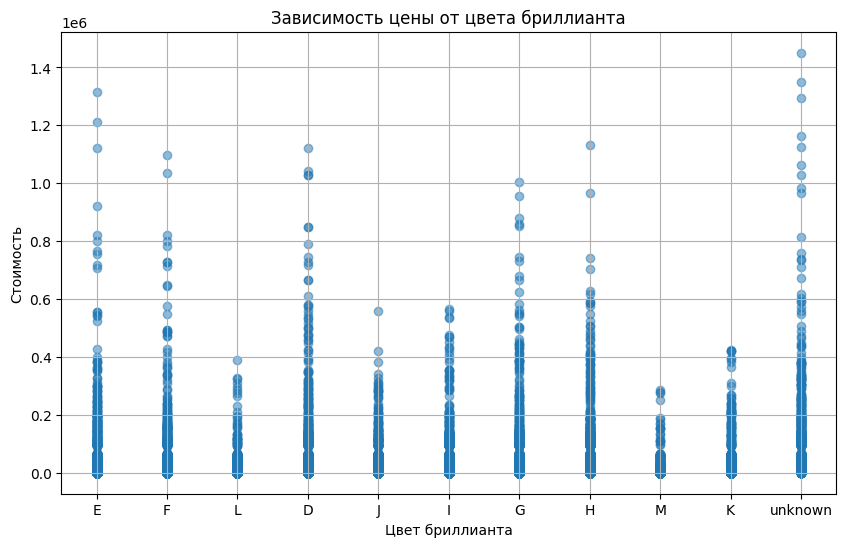

In [19]:
import matplotlib.pyplot as plt

cleaned_data = diamonds.dropna(subset=['color', 'total_sales_price'])

plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['color'], cleaned_data['total_sales_price'], alpha=0.5)
plt.title('Зависимость цены от цвета бриллианта')
plt.xlabel('Цвет бриллианта')
plt.ylabel('Стоимость')
plt.grid(True)
plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

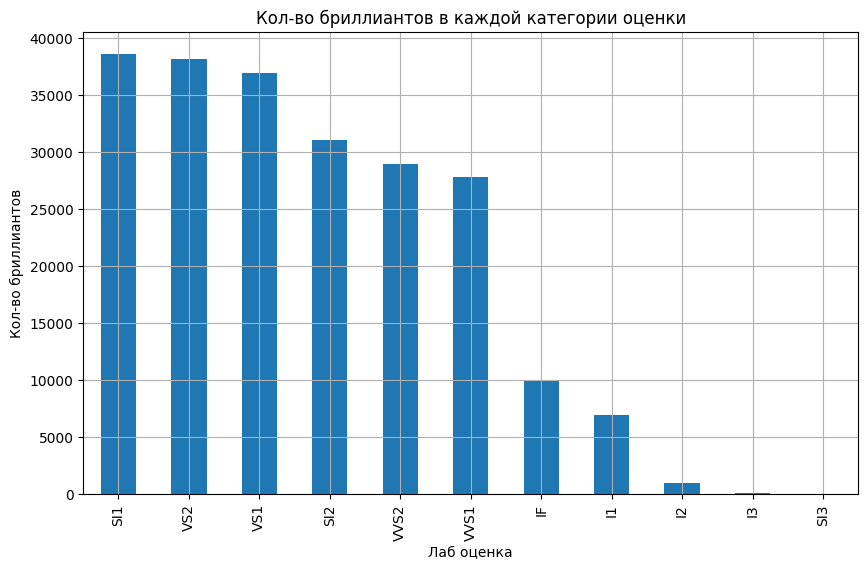

In [22]:
counts = diamonds['clarity'].value_counts()
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Кол-во бриллиантов в каждой категории оценки')
plt.ylabel('Кол-во бриллиантов')
plt.xlabel('Лаб оценка')
plt.grid(True)
plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

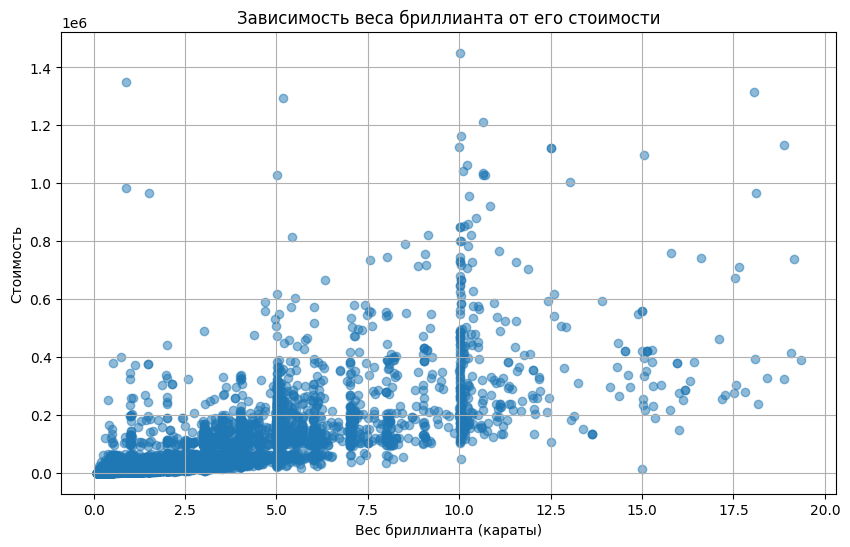

In [23]:
plt.figure(figsize=(10, 6))
plt.title('Зависимость веса бриллианта от его стоимости')
plt.xlabel('Вес бриллианта (караты)')
plt.ylabel('Стоимость')

plt.scatter(diamonds['carat_weight'], diamonds['total_sales_price'], alpha=0.5)
plt.grid(True)
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

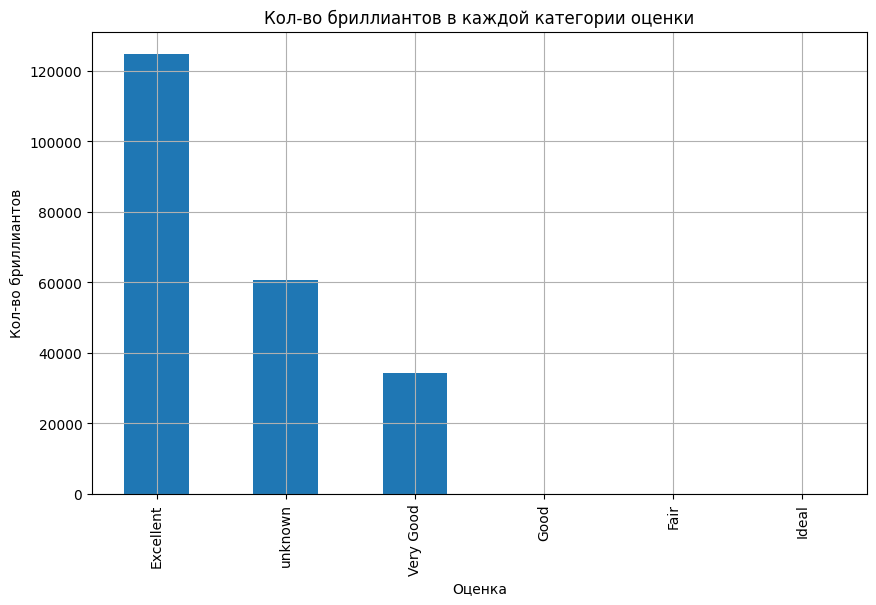

In [25]:
counts = diamonds['cut_quality'].value_counts()
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Кол-во бриллиантов в каждой категории оценки')
plt.ylabel('Кол-во бриллиантов')
plt.xlabel('Оценка')
plt.grid(True)
plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Ваши выводы здесь :)
Самое большое количество бриллиантов иметт оценку "excellent". Прослеживается зависимость между весом бриллианта и его стоимостью, за исключение вырожденных случаев, которые имеют высокую стоимость при маленьком весе. Самое большое колво бриллиантов получило лабораторную оценку SI1 , меньшего всего бриллиантов имеют оценку I2. Для самого дорогого бриллианта цвет не был определ. Примерно для трети всех бриллиантов получить точную оценку GIA Cut не удалось

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [26]:
diamonds_mod = diamonds[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']].copy()
diamonds_mod.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [28]:
diamonds_mod = diamonds_mod.sample(frac=1)

(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [30]:
def minkowski(row):
    return (row['meas_length'] ** 3 + row['meas_width'] ** 3 + row['meas_depth'] ** 3) ** (1/3)

diamonds_mod['minkowski'] = diamonds_mod.apply(minkowski, axis=1)
diamonds_mod.head(10)

,meas_length,meas_width,meas_depth,total_sales_price,minkowski_sum,minkowski
186664,6.72,6.76,4.24,9454,8.830598,8.830598
52801,4.26,4.29,2.67,938,5.596602,5.596602
56613,4.74,3.24,2.14,960,5.316939,5.316939
125911,5.61,5.67,3.29,2684,7.333852,7.333852
155599,5.77,5.83,3.64,4013,7.597159,7.597159
25750,4.34,4.37,2.72,778,5.701340,5.701340
173084,7.57,5.61,3.60,6276,8.693431,8.693431
88069,5.07,5.09,3.09,1292,6.632012,6.632012
60339,4.34,4.37,2.68,1002,5.692354,5.692354
133955,5.35,5.38,3.33,3026,7.018842,7.018842


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [ ]:
# your code here

(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [ ]:
# your code here

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

In [ ]:
# your code here

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

In [ ]:
# your code here

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
# your code here

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
# your code here

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)